In [ ]:
!pip install spectral

     |████████████████████████████████| 184 kB 32.2 MB/s 
  Created wheel for spectral: filename=spectral-0.22.2-py3-none-any.whl size=212954 sha256=9c0835e6f7db84ae1e915965a75e14a73672e367ecfca161af4ea44edf6df4ff
  Stored in directory: /root/.cache/pip/wheels/8b/3c/53/b5300d56bee75c16de9b19cd481c419cc63929f2e4019a6235
Successfully built spectral


In [ ]:
import numpy as np
import tifffile as tiff
from skimage.transform import rescale
import skimage.color as color
from spectral import imshow

In [ ]:
multi = tiff.imread('/content/drive/MyDrive/Live integração de dados/cut.tif')
VH = tiff.imread('/content/drive/MyDrive/Live integração de dados/VH.tif')

In [ ]:
rgb = np.empty((multi.shape[0], multi.shape[1], 4)) 
rgb[:,:,0] = multi[:,:,0] # blue
rgb[:,:,1] = multi[:,:,1] # green
rgb[:,:,2] = multi[:,:,2] # red
rgb[:,:,3] = multi[:,:,3] # IR
    
rgb_scaled = np.empty((multi.shape[0], multi.shape[1], 4))
#-------------------------------------------------------------------------------
for i in range(4):
  img = rgb[:,:,i]
  scaled = rescale(img, (1,1))
  rgb_scaled[:,:,i] = scaled
    
#-------------------------------------------------------------------------------    
if VH.shape[0] < rgb_scaled.shape[0]:
  rgb_scaled = rgb_scaled[:VH.shape[0],:, :]
else:
  VH = VH[:rgb_scaled.shape[0], :]
        
if VH.shape[1] < rgb_scaled.shape[1]:
  rgb_scaled = rgb_scaled[:,:VH.shape[1], :]
else:
  VH = VH[:,:rgb_scaled.shape[1]]

B = rgb_scaled[:,:,0]
G = rgb_scaled[:,:,1]
R = rgb_scaled[:,:,2]
I = rgb_scaled[:,:,3]

In [ ]:
def IHS(multi, sar, W=0.1):
  ihs = color.rgb2hsv(rgb_scaled[:,:,:3])
  ihs[:,:,2] = sar - I*W
  image = color.hsv2rgb(ihs)
  return image

In [ ]:
imshow(multi, bands=(2,1,0), stretch=(0.02))

ImageView object:
  Display bands       :  (2, 1, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-64.54052280971136, -29.020842849667073]
    G: [-71.90435758191485, -29.585814774654118]
    B: [-75.40612640380826, -33.65631246396984]

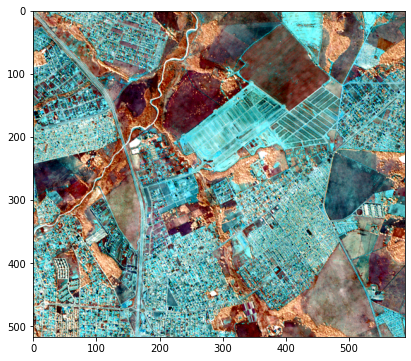

In [ ]:
imshow(IHS(multi, VH), bands=(2,1,0), stretch=(0.02))

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [245.0, 594.0]
    G: [245.0, 594.0]
    B: [245.0, 594.0]

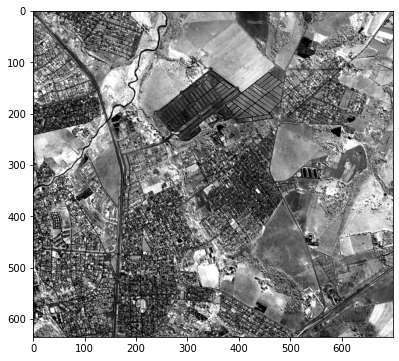

In [ ]:
imshow(multi[:,:,3], stretch=(0.02))

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-22.81406593322754, -10.942625999450684]
    G: [-22.81406593322754, -10.942625999450684]
    B: [-22.81406593322754, -10.942625999450684]

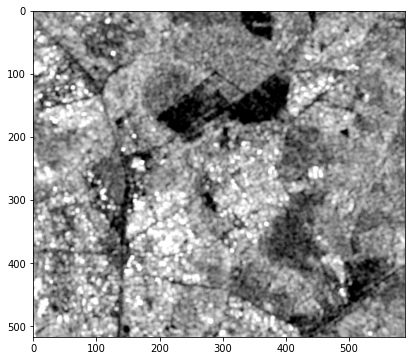

In [ ]:
imshow(VH, stretch=(0.02))